<div align="center">

# Play Ground Series S3 E26

## 💉 Predicting outcomes of patients with cirrhosis 💉

### Welcome to my kaggle notebook! For this Episode of the Series, is to use a multi-class approach to predict the the outcomes of patients with cirrhosis.

</div>

## Goal: For this Episode of the Series, is to use a multi-class approach to predict the the outcomes of patients with cirrhosis

In [ ]:
# Standard library imports
import pandas as pd
import numpy as np
import seaborn as sns
import ydata_profiling as pp

# Plotting libraries
import matplotlib.pyplot as plt
import ipywidgets as widgets
import plotly.express as px

# ML imports

In [74]:
df_train = pd.read_csv(r"..\data\train.csv").drop(columns=['id'],axis=1)
df_test = pd.read_csv(r"..\data\test.csv")
df_original = pd.read_csv(r"..\data\cirrhosis.csv").drop(columns=['ID'],axis=1).dropna()
#display(df_train.head())
#display(df_test.head())
#display(df_original.head())
display(df_original.shape)

test_ids = df_test.id

df_full_train = pd.concat([df_train, df_test],ignore_index=True)
df_full_train.shape

(276, 19)

(13176, 20)

In [68]:
# dropped na values   incorporate this into the pipeline

df_original.isna().sum()
#drop rows with missing values
df_original.dropna(inplace=True)
df_original.shape
df_original.head()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [63]:
df_full_train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,id
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,NaN
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,NaN
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,NaN
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,NaN
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,NaN


In [ ]:
pp.ProfileReport(df_train)

In [24]:
def analyze_dataframe(df):
    """
    Analyze a pandas DataFrame and provide a summary of its characteristics.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
    None
    """
    print("DataFrame Information:")
    print("______________________")
    display(df.info(verbose=True, show_counts=True))
    print("\n")
    
    print("DataFrame Head:")
    print("______________________")
    display(df.head())
    print("\n")

    print("DataFrame Tail:")
    print("______________________")
    display(df.tail())
    print("\n")

    print("DataFrame Description:")
    print("______________________")
    display(df.describe().T)
    print("\n")

    print("Number of Null Values:")
    print("______________________")
    display(df.isnull().sum())
    print("\n")

    print("Number of Duplicated Rows:")
    print("______________________")
    display(df.duplicated().sum())
    print("\n")

    print("Number of Unique Values:")
    print("______________________")
    display(df.nunique())
    print("\n")

    print("DataFrame Shape:")
    print("______________________")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

analyze_dataframe(df_test)

DataFrame Information:
______________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothr

None



DataFrame Head:
______________________


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0




DataFrame Tail:
______________________


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
5266,13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1216,Placebo,11773,F,N,N,N,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0
5270,13175,2272,D-penicillamine,21600,F,N,N,N,N,2.0,232.0,3.42,18.0,1636.0,170.50,83.0,213.0,13.6,2.0




DataFrame Description:
______________________


,count,mean,std,min,25%,50%,75%,max
id,5271.0,10540.000000,1521.750965,7905.00,9222.50,10540.00,11857.50,13175.00
N_Days,5271.0,2038.696642,1086.843490,41.00,1234.00,1882.00,2692.00,4795.00
Age,5271.0,18497.756782,3583.898801,9598.00,15730.00,18806.00,20684.00,28650.00
Bilirubin,5271.0,2.600389,3.852395,0.30,0.70,1.10,3.00,28.00
Cholesterol,5271.0,352.486435,200.438989,120.00,248.00,299.00,390.00,1775.00
Albumin,5271.0,3.538071,0.354886,1.96,3.35,3.57,3.77,4.64
Copper,5271.0,84.701679,77.542064,4.00,39.00,65.00,102.00,588.00
Alk_Phos,5271.0,1811.233314,1935.351492,289.00,823.00,1142.00,1838.50,13862.40
SGOT,5271.0,113.587526,48.964789,26.35,75.00,106.95,137.95,457.25
Tryglicerides,5271.0,115.286094,52.602780,33.00,84.00,104.00,138.00,598.00




Number of Null Values:
______________________


id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64



Number of Duplicated Rows:
______________________


0



Number of Unique Values:
______________________


id               5271
N_Days            409
Drug                2
Age               363
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         108
Cholesterol       222
Albumin           154
Copper            164
Alk_Phos          362
SGOT              195
Tryglicerides     155
Platelets         223
Prothrombin        47
Stage               4
dtype: int64



DataFrame Shape:
______________________
Rows: 5271, Columns: 19


## Data points interpretation
___
1. **Ascites**: Ascites is a medical term for an abnormal fluid buildup in the abdominal cavity, specifically in the peritoneal space. This syndrome is frequently caused by underlying health conditions such as liver disease, cirrhosis, heart failure, cancer, or infections.

2. **Hepatomegaly**: Hepatomegaly refers to an enlargement of the liver. It is a non-specific medical sign, having many causes, which can broadly be broken down into infection, hepatic tumors, and metabolic disorder.

3. **Spiders**: In medical terms, 'spiders' could refer to spider angiomas (also known as spider nevi), which are common skin lesions consisting of central arterioles surrounded by many smaller vessels due to high estrogen levels and may occur in any condition with high estrogen states such as cirrhosis.

4. **Edema**: Edema is swelling caused by fluid trapped in your body’s tissues, most often in your feet, ankles, and legs. Your healthcare provider will test your edema by pressing their finger into the swollen area (pitting) to identify how much fluid is in your tissues (grade).

5. **Bilirubin**: Bilirubin is a reddish-yellow water-insoluble pigment that is formed by the breakdown of heme, is excreted in a water-soluble form by liver cells into bile, and occurs in blood and urine especially in diseased states.

6. **Cholesterol**: Cholesterol is a waxy, fat-like substance that's found in all the cells in your body. Your body needs some cholesterol to make hormones, vitamin D, and substances that help you digest foods.

7. **Albumin**: Albumin is a type of protein that is found in your blood. It's produced by your liver and serves several important functions in the body. One of its main roles is to help maintain the right amount of water in your blood and tissues.

8. **Copper**: Copper, an essential mineral, is naturally present in some foods and is available as a dietary supplement. It is a cofactor for several enzymes (known as cuproenzymes) involved in energy production, iron metabolism, 
neuropeptide activation, connective tissue synthesis, and neurotransmitter synthesis.

9. **Alk_Phos**: Alkaline phosphatase (ALP) is an enzyme that’s found throughout your body. An enzyme is a type of protein in a cell that acts as a catalyst and allows certain bodily processes to happen.

10. **SGOT**: Serum glutamic oxaloacetic transaminase (SGOT), also known as aspartate aminotransferase (AST), is an enzyme that is normally present in liver and heart cells. SGOT is released into blood when the liver or heart is damaged.

## Possible interactions of the data points
___
1. **Bilirubin and Albumin**: These are both liver function tests. Bilirubin levels can increase due to liver dysfunction, while albumin levels can decrease. Their interaction might be indicative of the severity of liver disease.

2. **Ascites and Edema with Albumin**: Ascites and edema are clinical signs of advanced liver disease and can be influenced by the level of albumin, as it plays a crucial role in maintaining oncotic pressure in the blood vessels.

3. **Alkaline Phosphatase (Alk_Phos) and Bilirubin**: Both are markers of liver function. Elevated levels can indicate cholestasis or blockage of bile flow, often seen in liver diseases.

4. **SGOT and Bilirubin**: SGOT is an enzyme that can be elevated in liver damage. Together with bilirubin, these levels can indicate the extent of liver injury.

5. **Platelets and Prothrombin**: Both are involved in blood clotting. Liver disease can lead to thrombocytopenia (low platelet count) and prolonged prothrombin time, reflecting impaired liver synthesis function.

6. **Cholesterol and Triglycerides**: These are both lipids, and their interaction can be relevant in understanding the overall lipid profile, which is important in the context of cardiovascular risk and metabolic health.

7. **Drug (D-penicillamine) with Liver Function Tests**: The interaction between the use of D-penicillamine and liver function tests like Bilirubin, Albumin, Alk Phos might be insightful, especially in patients with Wilson’s Disease or liver involvement in Rheumatoid Arthritis.

8. **Age with Various Biomarkers**: Age might modulate the relationship between various biomarkers (like Bilirubin, Albumin, SGOT) and clinical outcomes.



In [ ]:
def prelim_eda_histplot(df):
    """
    Create a histogram plot of each column in a pandas DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
    None
    """
    columns_to_plot = df.drop(['id','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Stage','Status'], axis=1)      


    num_columns = len(columns_to_plot.columns)
    num_rows = (num_columns - 1) // 4 + 1  # Calculate the number of rows based on the number of columns
    num_cols = min(num_columns, 4)  # Set the number of columns to 4 or the number of columns in the DataFrame, whichever is smaller
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))  # Adjust the figsize as needed

    # Loop over selected columns and create histogram plots in separate subplots
    for i, column in enumerate(columns_to_plot):
        row = i // num_cols
        col = i % num_cols
        sns.histplot(data=df, x=column, ax=axes[row, col], kde=True, bins=20)
        axes[row, col].set_title(f'{column}', fontsize=14)
        axes[row, col].set_aspect('auto')

    # Remove empty subplots (if any)
    for i in range(num_columns, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()

prelim_eda_histplot(df_train)

In [ ]:
def create_boxplots(df, exclude_columns):
    """
    Create a series of boxplot subplots for the given DataFrame, excluding specified columns.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    exclude_columns (list): List of column names to exclude from plotting.

    Returns:
    matplotlib.figure.Figure: The figure object containing the subplots.
    """
    # Dropping the specified columns
    df_to_plot = df.drop(exclude_columns, axis=1)
    num_cols = len(df_to_plot.columns)
    
    # Determining the layout of the subplot grid
    cols_per_row = 3
    rows = (num_cols + cols_per_row - 1) // cols_per_row

    # Creating the subplots
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Flatten in case of a single row

    for i, col in enumerate(df_to_plot.columns):
        df_to_plot.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col)

    # Hide unused subplots
    for j in range(i + 1, rows * cols_per_row):
        fig.delaxes(axes[j])

    plt.tight_layout()
    return fig

# Columns to exclude from the plot
exclude_columns = ['id', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage', 'Status']

# Creating the boxplot subplots
fig = create_boxplots(df_train, exclude_columns)
plt.show()


In [ ]:
def create_heatmap(df, figsize=(10, 8), annot=True, cmap='coolwarm',fmt='.1f'):
    """
    Create a heatmap for the correlation matrix of the numeric columns in the given DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    figsize (tuple): Size of the heatmap.
    annot (bool): If True, write the data value in each cell.
    cmap (str): Colormap used for the heatmap.

    Returns:
    matplotlib.figure.Figure: The figure object containing the heatmap.
    """
    plt.figure(figsize=figsize)

    # Select only numeric columns for correlation matrix
    numeric_df = df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr()

    sns.heatmap(correlation_matrix, annot=annot, cmap=cmap, fmt=fmt)
    plt.title('Heatmap of Correlation Matrix')
    plt.show()

# Example usage
create_heatmap(df_train)

c:\Users\brand\.conda\envs\kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\brand\.conda\envs\kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\brand\.conda\envs\kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\brand\.conda\envs\kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

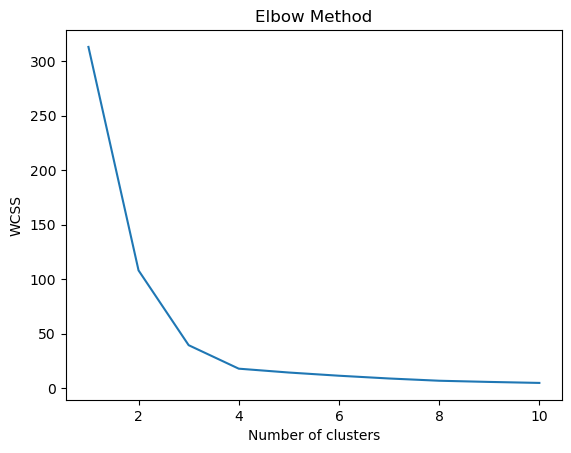

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

# Create a random dataset
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 4])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3, 9, 10, 9, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# Run KMeans for k=1 to k=10 and calculate the within-cluster sum of squares (WCSS) value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Feature Engineering: Converting Age from days to years and creating interaction features  and liver health indicators
___

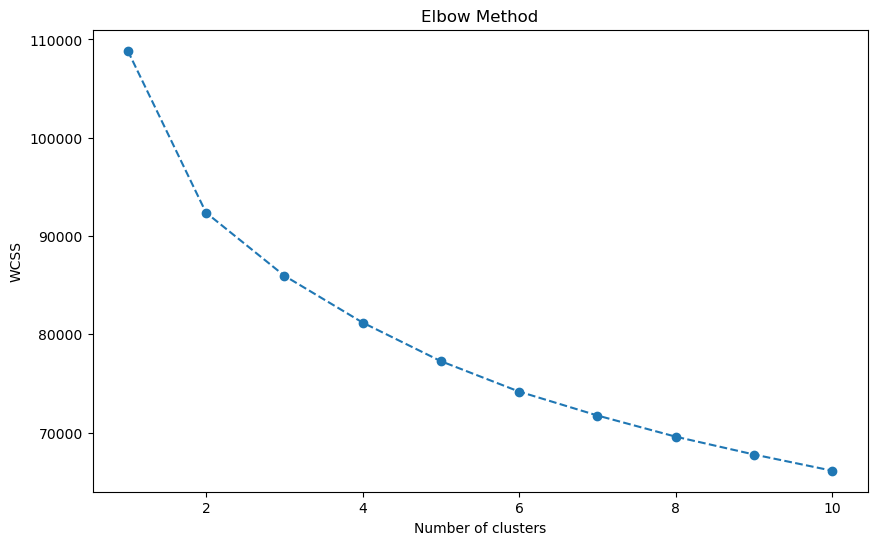

c:\Users\brand\.conda\envs\kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Identifying numeric and categorical columns (excluding 'id' and 'Status')
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])
categorical_features = df_train.select_dtypes(include=['object']).drop(columns=['Status'])

# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features.columns),
        ('cat', categorical_transformer, categorical_features.columns)])

# Apply the transformations
data_preprocessed = preprocessor.fit_transform(df_train)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Trying k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_preprocessed)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters (n_clusters) based on the Elbow plot
n_clusters = int(input("Enter the optimal number of clusters: "))

# Applying K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df_train['cluster'] = kmeans.fit_predict(data_preprocessed)

# Calculate the distance of each point to the centroid of its cluster
distances_to_centroid = kmeans.transform(data_preprocessed)
for i in range(n_clusters):
    df_train[f'distance_to_cluster_{i}'] = distances_to_centroid[:, i]

In [20]:
df_train.head(20)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Tryglicerides,Platelets,Prothrombin,Stage,Status,cluster,distance_to_cluster_0,distance_to_cluster_1,distance_to_cluster_2,distance_to_cluster_3
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,...,63.0,394.0,9.7,3.0,D,2,4.988866,3.869906,3.791936,4.669600
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,...,88.0,361.0,11.0,3.0,C,2,3.843567,2.518445,1.864647,4.562108
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,...,50.0,199.0,11.7,4.0,D,1,4.989570,3.252867,4.169352,4.986909
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,...,96.0,269.0,10.7,3.0,C,2,3.555422,2.335141,1.447077,4.979011
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,...,96.0,298.0,10.6,4.0,C,1,4.204107,1.868369,2.753033,4.276105
5,5,703,D-penicillamine,19270,F,N,Y,N,N,0.6,...,68.0,213.0,11.5,3.0,D,0,2.753117,3.639369,4.182565,5.496014
6,6,1300,Placebo,17703,F,N,N,N,N,1.0,...,90.0,291.0,9.8,3.0,C,2,3.996427,2.550718,2.019289,4.611324
7,7,1615,Placebo,21281,F,N,Y,N,N,0.6,...,214.0,227.0,9.9,3.0,C,2,4.903426,3.487188,3.231079,5.448855
8,8,2050,D-penicillamine,20684,F,N,N,N,N,0.7,...,154.0,269.0,9.8,2.0,C,2,3.353674,3.325932,2.085959,4.862623
9,9,2615,D-penicillamine,15009,F,N,N,N,N,0.9,...,140.0,234.0,10.6,2.0,C,2,4.243591,3.295665,2.339258,4.645235


In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Identifying numeric and categorical columns (excluding 'id' and 'Status')
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])
categorical_features = df_train.select_dtypes(include=['object']).drop(columns=['Status'])

# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features.columns),
        ('cat', categorical_transformer, categorical_features.columns)])

# Apply the transformations
data_preprocessed = preprocessor.fit_transform(df_train)

# Number of clusters
n_clusters = 5  # You can adjust this based on your analysis

# Applying K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df_train['cluster'] = kmeans.fit_predict(data_preprocessed)

# Calculate the distance of each point to the centroid of its cluster
distances_to_centroid = kmeans.transform(data_preprocessed)
for i in range(n_clusters):
    df_train[f'distance_to_cluster_{i}'] = distances_to_centroid[:, i]


c:\Users\brand\.conda\envs\kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Platelets,Prothrombin,Stage,Status,cluster,distance_to_cluster_0,distance_to_cluster_1,distance_to_cluster_2,distance_to_cluster_3,distance_to_cluster_4
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,...,394.0,9.7,3.0,D,1,5.010996,3.771246,3.851829,5.442654,4.577277
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,...,361.0,11.0,3.0,C,2,3.844072,2.313097,1.905709,5.036050,4.412960
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,...,199.0,11.7,4.0,D,1,5.011652,3.358107,4.239844,5.987869,4.333798
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,...,269.0,10.7,3.0,C,2,3.545129,2.125577,1.445173,5.729135,4.518426
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,...,298.0,10.6,4.0,C,1,4.220889,1.719373,2.889229,4.935977,3.999269


In [4]:
def convert_age_and_create_interactions(df):
    """
    Convert 'Age' from days to years and create interaction features.

    Parameters:
    df (pandas.DataFrame): The input DataFrame.

    Returns:
    pandas.DataFrame: The modified DataFrame.
    """
    # Feature Engineering: Categorical Variable Interactions and Grouped Categorical Variables

    # Creating interaction features for categorical variables
    df['Ascites_Edema'] = df['Ascites'] + "_" + df['Edema']
    df['Ascites_Spiders'] = df['Ascites'] + "_" + df['Spiders']
    df['Hepatomegaly_Spiders'] = df['Hepatomegaly'] + "_" + df['Spiders']

    # Creating grouped categorical variables based on health
    # Grouping liver health indicators: Ascites, Hepatomegaly, Spiders
    # Counting the number of 'Y' (Yes) responses in these columns
    df['Liver_Health_Indicators'] = df[['Ascites', 'Hepatomegaly', 'Spiders']].apply(lambda x: (x == 'Y').sum(), axis=1)

    df['Age_years'] = df['Age'] / 365.25
    df['Bilirubin_Albumin_interaction'] = df['Bilirubin'] * df['Albumin']
    df['Platelets_Prothrombin_interaction'] = df['Platelets'] * df['Prothrombin']
    
    return df
pp_train = convert_age_and_create_interactions(df_train)
pp_test = convert_age_and_create_interactions(df_test)


In [ ]:
pp_train.info()

In [ ]:
def master_preprocessing(df):
    """
    Apply all preprocessing steps to the dataframe.

    :param df: DataFrame to be processed
    :param features_to_transform: List of features to transform outliers in
    :return: Preprocessed DataFrame
    """
    # Apply preprocessing for new features
    df = convert_age_and_create_interactions(df)
    return df

In [12]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK, space_eval


# Encoding the target variable 'Status' if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(pp_train['Status'])

# Selecting categorical columns (excluding the target variable 'Status')
cat_cols = pp_train.select_dtypes(include=['object']).drop(columns=['Status']).columns

# Preprocessing with OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), pp_train.select_dtypes(exclude=['object']).drop(['id'], axis=1).columns),
        ('cat', OneHotEncoder(), cat_cols)
    ])

# Fit and transform the training data
X = preprocessor.fit_transform(pp_train.drop(columns=['Status', 'id']))  # Assuming 'id' is not a feature

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the space of hyperparameters to search
space = {
    'max_depth': hp.quniform('max_depth', 1, 6, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 10),
    'reg_lambda': hp.uniform('reg_lambda', 1, 10),
    'gamma': hp.loguniform('gamma', -10, 10),
    'learning_rate': hp.loguniform('learning_rate', -7, 0),
    'random_state': 42,

}

def objective(params):
    params['max_depth'] = int(params['max_depth'])  # Convert max_depth to integer
    xgb_model = xgb.XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', **params)
    xgb_model.fit(X_train, y_train)
    y_pred_class = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_class)
    return {'loss': -accuracy, 'status': STATUS_OK}

# Run the hyperparameter search using the tpe algorithm
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=2000,  # Adjust based on your computation resource
            trials=Trials())

print("Best parameters: ", best)
#Best parameters:  {'colsample_bytree': 0.5718972236991896, 'gamma': 0.002026237508639373, 'learning_rate': 0.08610522512186816, 'max_depth': 6.0, 'reg_alpha': 0.3201786156676163, 'reg_lambda': 1.776163603505028, 'subsample': 0.5885196449190324}

# Evaluating the best model
best_params = space_eval(space, best)
best_params['max_depth'] = int(best_params['max_depth'])  # Ensure max_depth is an integer

best_xgb = xgb.XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', n_jobs=-1, **best_params)
best_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=True)


# Making predictions and calculating accuracy on the test set
y_pred_class = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Model Accuracy with best estimator: {accuracy:.2f}")

# Transform the test data using the same preprocessor
X_new = preprocessor.transform(pp_test.drop(columns=['id']))

# Making predictions on the new data
predictions = best_xgb.predict_proba(X_new)


100%|██████████| 3500/3500 [34:59<00:00,  1.67trial/s, best loss: -0.8500948766603416]
Best parameters:  {'colsample_bytree': 0.5718972236991896, 'gamma': 0.002026237508639373, 'learning_rate': 0.08610522512186816, 'max_depth': 6.0, 'reg_alpha': 0.3201786156676163, 'reg_lambda': 1.776163603505028, 'subsample': 0.5885196449190324}
[0]	validation_0-mlogloss:1.03022
[1]	validation_0-mlogloss:0.96851
[2]	validation_0-mlogloss:0.91634
[3]	validation_0-mlogloss:0.86946
[4]	validation_0-mlogloss:0.82862
[5]	validation_0-mlogloss:0.79311
[6]	validation_0-mlogloss:0.76165
[7]	validation_0-mlogloss:0.73328
[8]	validation_0-mlogloss:0.70741
[9]	validation_0-mlogloss:0.68517
[10]	validation_0-mlogloss:0.66492
[11]	validation_0-mlogloss:0.64670
[12]	validation_0-mlogloss:0.63050
[13]	validation_0-mlogloss:0.61528
[14]	validation_0-mlogloss:0.60124
[15]	validation_0-mlogloss:0.58878
[16]	validation_0-mlogloss:0.57720
[17]	validation_0-mlogloss:0.56648
[18]	validation_0-mlogloss:0.55716
[19]	validati

c:\Users\brand\.conda\envs\kaggle\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-mlogloss:0.49842
[28]	validation_0-mlogloss:0.49462
[29]	validation_0-mlogloss:0.49079
[30]	validation_0-mlogloss:0.48733
[31]	validation_0-mlogloss:0.48368
[32]	validation_0-mlogloss:0.48043
[33]	validation_0-mlogloss:0.47742
[34]	validation_0-mlogloss:0.47475
[35]	validation_0-mlogloss:0.47239
[36]	validation_0-mlogloss:0.47005
[37]	validation_0-mlogloss:0.46835
[38]	validation_0-mlogloss:0.46678
[39]	validation_0-mlogloss:0.46529
[40]	validation_0-mlogloss:0.46395
[41]	validation_0-mlogloss:0.46273
[42]	validation_0-mlogloss:0.46127
[43]	validation_0-mlogloss:0.45966
[44]	validation_0-mlogloss:0.45832
[45]	validation_0-mlogloss:0.45771
[46]	validation_0-mlogloss:0.45583
[47]	validation_0-mlogloss:0.45460
[48]	validation_0-mlogloss:0.45384
[49]	validation_0-mlogloss:0.45293
[50]	validation_0-mlogloss:0.45192
[51]	validation_0-mlogloss:0.45138
[52]	validation_0-mlogloss:0.45057
[53]	validation_0-mlogloss:0.44929
[54]	validation_0-mlogloss:0.44859
[55]	validation_0-ml

In [13]:
# Creating the DataFrame for submission
prediction_columns = ['Status_C', 'Status_CL', 'Status_D']
submission_df = pd.DataFrame(predictions, columns=prediction_columns)
submission_df['id'] = test_df['id']

# Reordering columns to make 'id' the first column
submission_df = submission_df[['id'] + prediction_columns]

# Saving the DataFrame to a CSV file
submission_df.to_csv(r'../data/submission.csv', index=False)